In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, plot_roc_curve, accuracy_score, f1_score

from xgboost import XGBClassifier

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

import utils as ut

In [2]:
data = pd.read_csv('data/training_set_features.csv')
labels = pd.read_csv('data/training_set_labels.csv')

In [3]:
# The features in this dataset
# You are provided a dataset with 36 columns. The first column respondent_id is a unique and random identifier. The remaining 35 features are described below.

# For all binary variables: 0 = No; 1 = Yes.

# h1n1_concern - Level of concern about the H1N1 flu.
# 0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
# h1n1_knowledge - Level of knowledge about H1N1 flu.
# 0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
# behavioral_antiviral_meds - Has taken antiviral medications. (binary)
# behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)
# behavioral_face_mask - Has bought a face mask. (binary)
# behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)
# behavioral_large_gatherings - Has reduced time at large gatherings. (binary)
# behavioral_outside_home - Has reduced contact with people outside of own household. (binary)
# behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)
# doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)
# doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)
# chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
# child_under_6_months - Has regular close contact with a child under the age of six months. (binary)
# health_worker - Is a healthcare worker. (binary)
# health_insurance - Has health insurance. (binary)
# opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
# 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
# opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
# 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
# opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
# 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
# opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
# 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
# opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
# 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
# opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
# 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
# age_group - Age group of respondent.
# education - Self-reported education level.
# race - Race of respondent.
# sex - Sex of respondent.
# income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.
# marital_status - Marital status of respondent.
# rent_or_own - Housing situation of respondent.
# employment_status - Employment status of respondent.
# hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
# census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
# household_adults - Number of other adults in household, top-coded to 3.
# household_children - Number of children in household, top-coded to 3.
# employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.
# employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

In [4]:
# train test split
# deal with nulls
# look for patterns in the nulls
# no numeric columns so no need to look for outliers
# one hot encode categorical columns
# scale
# vanilla model
# check for multicolinearity (or variables that are not independent)
# solve class imbalance problems?? - no need
# look for interactions? - marital status and sex, also employment status and sex
# logistic regression!
# -->can experiment with the regularization parameter (C)
# eval measure should be ROC-AUC (for competition anyway)
# try a tree!  a forest!
# try ensemble method?  XGBoost?
# pipeline!
# use confusion matrices to evaluate
# what can be learned from coefficients

# does health worker data match employment data?


In [5]:
# use k fold cross validation to make sure you're not overfitting to this test set
# try all combos for other models, use gridsearch
# steal and use Lindsey's evaluate function if you want - Topic 32 Pipelines plus phase 3 wrap up
# it includes a confusion matrix
# if doing a logreg, look at week 20 optional challenge

In [6]:

# look at practice notebook from week 22
# shows steps of building a simple model, testing models, iterating, choosing a model
# try to do 3 model types

# include all detail on "why did I make that decision?"  "why did I do that next step?"
# especially: why did you decide to use this model?


In [7]:
labels

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [8]:
# define X (predictors) and y (target)
# keep only predictors which a health management organization would have on file
# use seasonal flu vaccine outcome as target (disregard H1N1)

X = data.drop(columns=['h1n1_concern',
                       'h1n1_knowledge',
                       'behavioral_antiviral_meds',
                       'behavioral_avoidance',
                       'behavioral_face_mask',
                       'behavioral_wash_hands',
                       'behavioral_large_gatherings',
                       'behavioral_outside_home',
                       'behavioral_touch_face',
                       'doctor_recc_h1n1',
                       'child_under_6_months',
                       'opinion_h1n1_vacc_effective',
                       'opinion_h1n1_risk',
                       'opinion_h1n1_sick_from_vacc',
                       'opinion_h1n1_sick_from_vacc',
                       'opinion_seas_vacc_effective',
                       'opinion_seas_risk',
                       'opinion_seas_sick_from_vacc',
                       'education',
                       'income_poverty',
                       'rent_or_own',
                       'household_adults',
                       'household_children'])

y = labels['seasonal_vaccine']

In [9]:
X

,respondent_id,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,age_group,race,sex,marital_status,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,0,0.00000,0.00000,0.00000,1.00000,55 - 64 Years,White,Female,Not Married,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,1,0.00000,0.00000,0.00000,1.00000,35 - 44 Years,White,Male,Not Married,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,2,nan,1.00000,0.00000,nan,18 - 34 Years,White,Male,Not Married,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,3,1.00000,1.00000,0.00000,nan,65+ Years,White,Female,Not Married,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,4,0.00000,0.00000,0.00000,nan,45 - 54 Years,White,Female,Married,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,0.00000,0.00000,0.00000,nan,65+ Years,White,Female,Not Married,Not in Labor Force,qufhixun,Non-MSA,NaN,NaN
26703,26703,1.00000,0.00000,1.00000,1.00000,18 - 34 Years,White,Male,Not Married,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
26704,26704,0.00000,0.00000,0.00000,nan,55 - 64 Years,White,Female,Not Married,NaN,lzgpxyit,"MSA, Not Principle City",NaN,NaN
26705,26705,0.00000,0.00000,0.00000,0.00000,18 - 34 Years,Hispanic,Female,Married,Employed,lrircsnp,Non-MSA,fcxhlnwr,haliazsg


In [10]:
# eliminate id column, which is the same as index number

X.drop(columns='respondent_id', inplace=True)
X

,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,age_group,race,sex,marital_status,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,0.00000,0.00000,0.00000,1.00000,55 - 64 Years,White,Female,Not Married,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,0.00000,0.00000,0.00000,1.00000,35 - 44 Years,White,Male,Not Married,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,nan,1.00000,0.00000,nan,18 - 34 Years,White,Male,Not Married,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,1.00000,1.00000,0.00000,nan,65+ Years,White,Female,Not Married,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,0.00000,0.00000,0.00000,nan,45 - 54 Years,White,Female,Married,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.00000,0.00000,0.00000,nan,65+ Years,White,Female,Not Married,Not in Labor Force,qufhixun,Non-MSA,NaN,NaN
26703,1.00000,0.00000,1.00000,1.00000,18 - 34 Years,White,Male,Not Married,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
26704,0.00000,0.00000,0.00000,nan,55 - 64 Years,White,Female,Not Married,NaN,lzgpxyit,"MSA, Not Principle City",NaN,NaN
26705,0.00000,0.00000,0.00000,0.00000,18 - 34 Years,Hispanic,Female,Married,Employed,lrircsnp,Non-MSA,fcxhlnwr,haliazsg


In [11]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [12]:
# no class imbalance in target

y_train.value_counts()

0    10656
1     9374
Name: seasonal_vaccine, dtype: int64

In [13]:
# explore variables

X_train
X_train.describe()
X_train.info()

# many nulls
# many categorical columns --> need to one hot encode

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20030 entries, 23127 to 15654
Data columns (total 13 columns):
doctor_recc_seasonal     18408 non-null float64
chronic_med_condition    19293 non-null float64
health_worker            19432 non-null float64
health_insurance         10896 non-null float64
age_group                20030 non-null object
race                     20030 non-null object
sex                      20030 non-null object
marital_status           18967 non-null object
employment_status        18932 non-null object
hhs_geo_region           20030 non-null object
census_msa               20030 non-null object
employment_industry      10059 non-null object
employment_occupation    9955 non-null object
dtypes: float64(4), object(9)
memory usage: 2.1+ MB


In [14]:
# show per cent nulls by column
# about half of data is missing for health_insurance, employment_industry, employment_occupation

round((X_train.isna().sum()*100/len(X_train)),2)

doctor_recc_seasonal     8.10000
chronic_med_condition    3.68000
health_worker            2.99000
health_insurance        45.60000
age_group                0.00000
race                     0.00000
sex                      0.00000
marital_status           5.31000
employment_status        5.48000
hhs_geo_region           0.00000
census_msa               0.00000
employment_industry     49.78000
employment_occupation   50.30000
dtype: float64

In [15]:
# look closer at three columns with high null percentages - see if there is an obvious choice to impute

for c in X_train[['health_insurance','employment_industry','employment_occupation']]:
    print(X_train[c].value_counts())
    
# most ppl have health insurance, I can create a new column to indicate which rows are missing this info
# employment industry and occupation - when encoded, nulls will be ignored

1.00000    9594
0.00000    1302
Name: health_insurance, dtype: int64
fcxhlnwr    1845
wxleyezf    1364
ldnlellj     922
pxcmvdjn     801
atmlpfrs     684
arjwrbjb     647
xicduogh     632
mfikgejo     466
vjjrobsf     411
xqicxuve     395
rucpziij     387
saaquncn     250
cfqqtusy     246
mcubkhph     209
nduyfdeo     205
wlfvacwt     166
dotnnunm     146
haxffmxo     109
msuufmds      96
phxvnwax      70
qnlwzans       8
Name: employment_industry, dtype: int64
xtkaffoo    1295
mxkfnird    1147
emcorrxb     970
cmhcxjea     955
xgwztkwe     845
hfxkjkmi     577
qxajmpny     406
kldqjyjy     354
xqwwgdyp     350
uqqtjvyb     349
tfqavkke     290
ukymxvdu     271
vlluhbov     265
bxpfxfdn     263
ccgxvspp     254
oijqvulv     247
haliazsg     207
rcertsgn     205
xzmlyyjv     187
dlvbwzss     173
hodpvpew     162
dcjcmpih     109
pvmttkik      74
Name: employment_occupation, dtype: int64


In [16]:
# check all value counts

for c in X_train.columns:
    print(X_train[c].value_counts())

0.00000    12333
1.00000     6075
Name: doctor_recc_seasonal, dtype: int64
0.00000    13826
1.00000     5467
Name: chronic_med_condition, dtype: int64
0.00000    17280
1.00000     2152
Name: health_worker, dtype: int64
1.00000    9594
0.00000    1302
Name: health_insurance, dtype: int64
65+ Years        5097
55 - 64 Years    4220
45 - 54 Years    3920
18 - 34 Years    3907
35 - 44 Years    2886
Name: age_group, dtype: int64
White                15937
Black                 1582
Hispanic              1313
Other or Multiple     1198
Name: race, dtype: int64
Female    11923
Male       8107
Name: sex, dtype: int64
Married        10157
Not Married     8810
Name: marital_status, dtype: int64
Employed              10188
Not in Labor Force     7679
Unemployed             1065
Name: employment_status, dtype: int64
lzgpxyit    3243
fpwskwrf    2432
qufhixun    2302
bhuqouqj    2157
oxchjgsf    2150
kbazzjca    2135
mlyzmhmf    1665
lrircsnp    1588
atmpeygn    1506
dqpwygqj     852
Name: hhs_geo_

In [17]:
# create new df X_train_plot to contain a numeric age column for plotting

X_train_plot=X_train.copy()
X_train_plot['age_group_num'] = X_train_plot['age_group'].apply(lambda x:1 if (x == '18 - 34 Years')
                                                        else 2 if (x == '35 - 44 Years')
                                                        else 3 if (x == '45 - 54 Years')
                                                        else 4 if (x == '55 - 64 Years')
                                                        else 5)

In [18]:
# concatenate X_train_plot and y_train to create a df for plotting bar graphs

train_to_plot = pd.concat([X_train_plot, y_train], axis=1).drop(columns='age_group')
train_to_plot

,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,race,sex,marital_status,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation,age_group_num,seasonal_vaccine
23127,1.00000,1.00000,0.00000,1.00000,White,Female,Married,Employed,fpwskwrf,"MSA, Not Principle City",wxleyezf,oijqvulv,3,1
5547,0.00000,0.00000,0.00000,nan,White,Female,Not Married,Not in Labor Force,qufhixun,"MSA, Not Principle City",NaN,NaN,5,1
24940,0.00000,0.00000,0.00000,nan,White,Female,Married,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",NaN,NaN,4,0
6502,0.00000,0.00000,1.00000,nan,Black,Female,Married,Employed,fpwskwrf,"MSA, Principle City",saaquncn,dlvbwzss,1,0
25897,1.00000,0.00000,0.00000,1.00000,White,Male,Not Married,Not in Labor Force,fpwskwrf,"MSA, Not Principle City",NaN,NaN,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22902,0.00000,0.00000,0.00000,nan,White,Male,Not Married,Not in Labor Force,dqpwygqj,"MSA, Principle City",NaN,NaN,5,1
24897,0.00000,0.00000,0.00000,0.00000,White,Female,Not Married,Employed,kbazzjca,"MSA, Principle City",vjjrobsf,oijqvulv,1,0
8834,0.00000,0.00000,0.00000,1.00000,White,Male,Married,Not in Labor Force,fpwskwrf,"MSA, Not Principle City",NaN,NaN,5,1
23473,0.00000,nan,nan,nan,White,Female,NaN,NaN,bhuqouqj,"MSA, Not Principle City",NaN,NaN,1,0


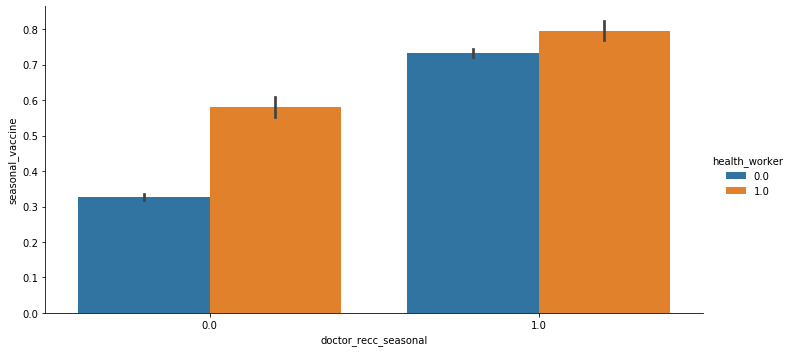

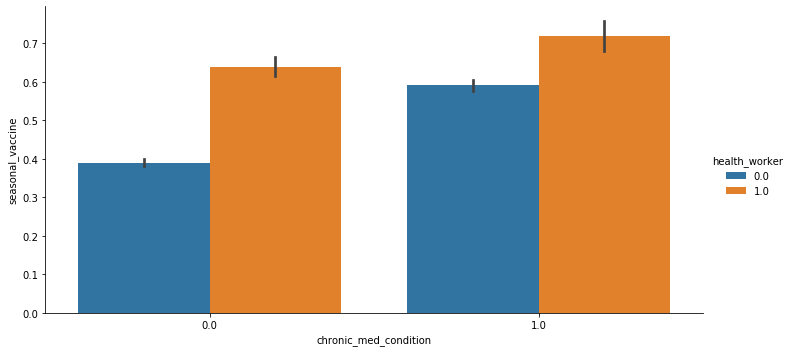

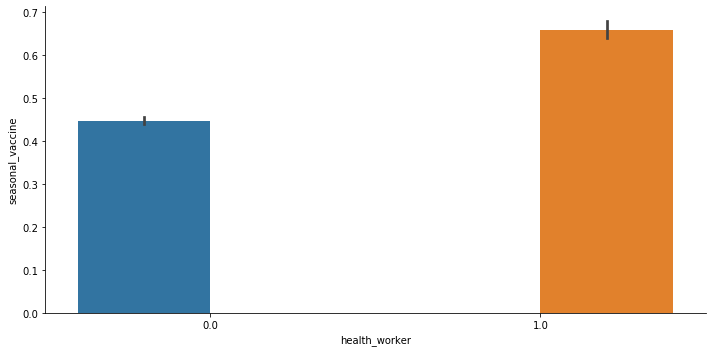

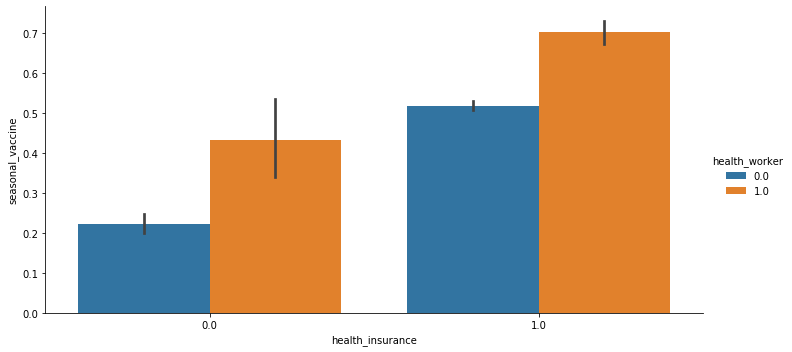

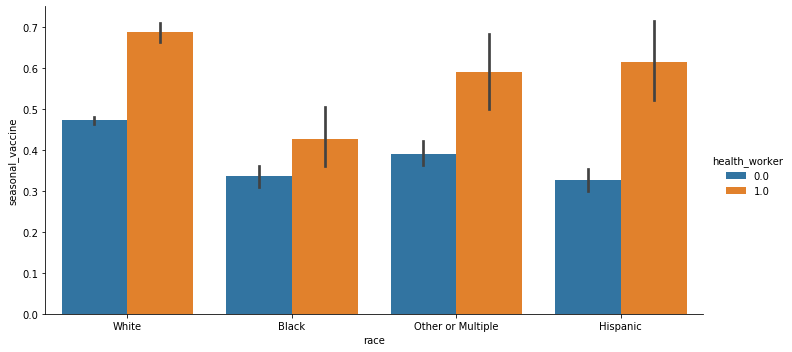

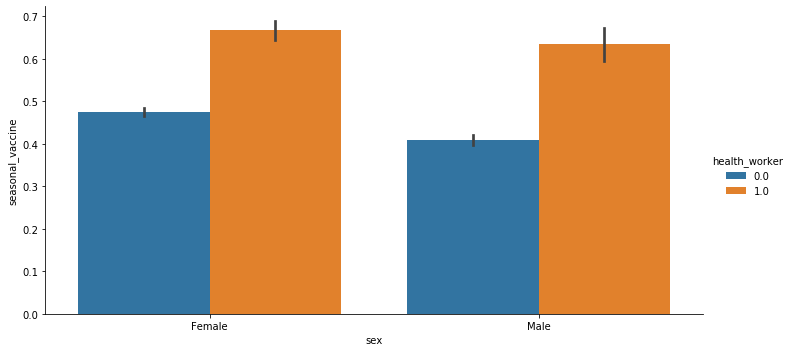

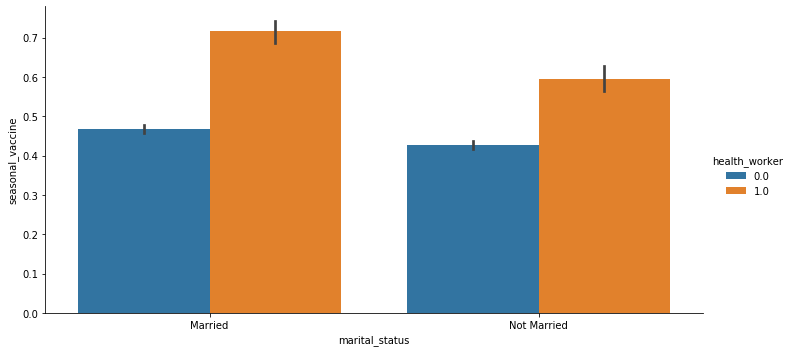

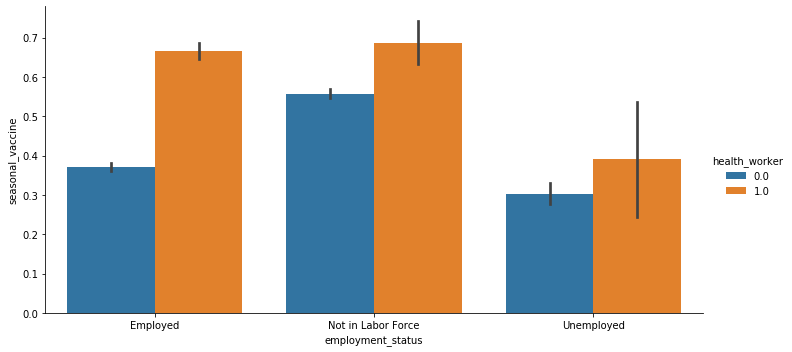

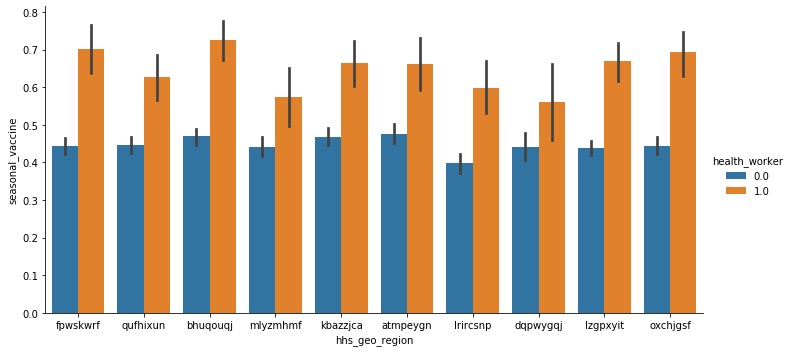

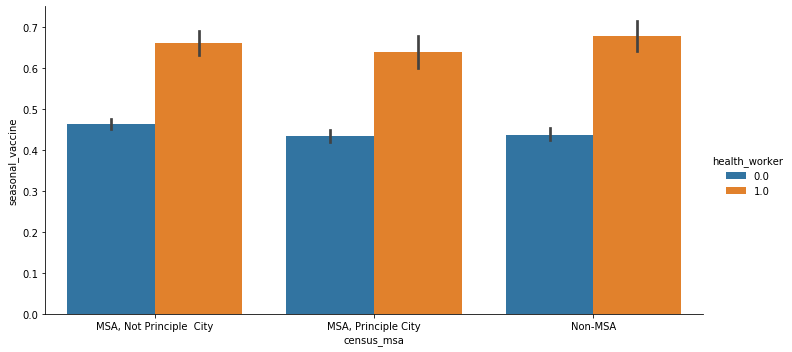

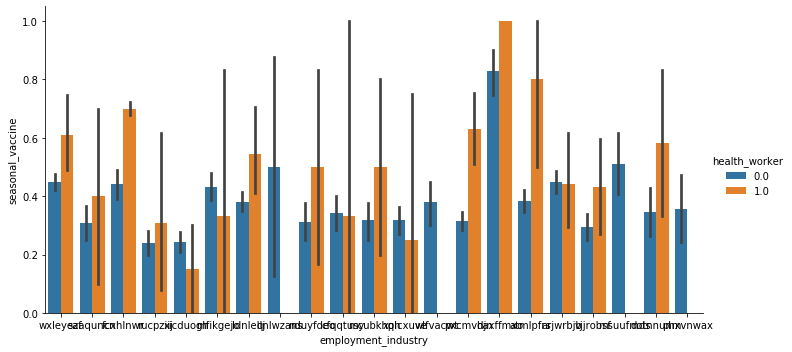

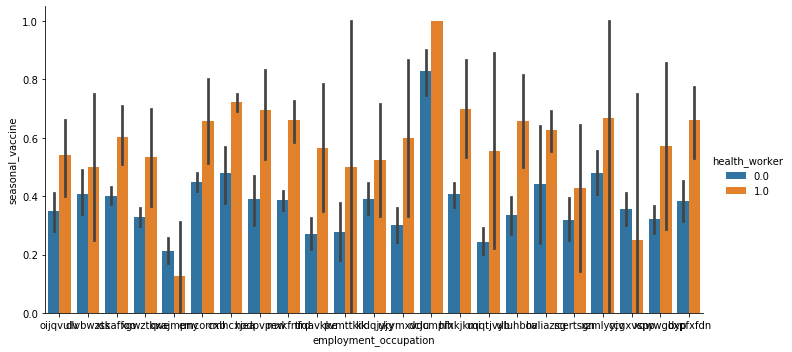

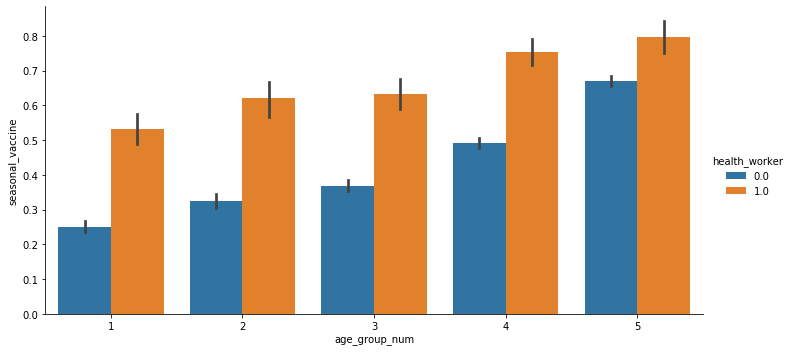

In [19]:
# plot bar graphs for each variable vs target
# test different hues to get sense of variable interactions
# one interaction is between 'sex' and 'marital_status' - married men get more vaccines than unmarried men
# also 'sex' and 'employment status' --> probably due to age
# really interesting interaction between 'race' and 'census-msa'

for c in train_to_plot.drop(columns=['seasonal_vaccine']).columns:
    sns.catplot(x=c, y="seasonal_vaccine", kind="bar", hue='health_worker', data=train_to_plot, height=5, aspect=2)

In [20]:
# investigate how many rows have nulls
# cannot delete rows with missing health_insurance, since about 50%
# check for overlaps in nulls in other 3 rows, may be possible to delete these rows

X_train_delete_nulls = X_train.loc[(X_train['doctor_recc_seasonal'].notnull()
                                      & X_train['chronic_med_condition'].notnull()
                                      & X_train['health_worker'].notnull())]
X_train_delete_nulls

# if we delete all nulls in all 3 columns, we lose 2295 rows, 11% of data

print('If I deleted rows with nulls in doctor_recc_seasonal, chronic_med_condition, health_worker:')
print('Number of rows deleted:', len(X_train) - len(X_train_delete_nulls))
print('Per cent of rows deleted:', round(((len(X_train) - len(X_train_delete_nulls))/len(X_train)*100),2), '%')

# my instinct is to impute a dummy value, but could also test a model with these rows deleted

If I deleted rows with nulls in doctor_recc_seasonal, chronic_med_condition, health_worker:
Number of rows deleted: 2243
Per cent of rows deleted: 11.2 %


In [21]:
# encode categorical columns in X_train
X_train_enc = pd.get_dummies(X_train, drop_first=False).drop(columns=['sex_Female','race_Other or Multiple'])


In [22]:
# 4 columns still have nulls
X_train_enc.isna().sum()[:4]

doctor_recc_seasonal     1622
chronic_med_condition     737
health_worker             598
health_insurance         9134
dtype: int64

In [23]:
# fill nans with 0.5

X_train_nans = X_train_enc.copy()
X_train_nans.fillna(value=0.5, inplace=True)
X_train_nans.isna().sum().sum() #0
X_train_nans.shape #(20030, 81)
X_train_nans

,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,race_Black,race_Hispanic,race_White,sex_Male,marital_status_Married,marital_status_Not Married,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,employment_industry_arjwrbjb,employment_industry_atmlpfrs,employment_industry_cfqqtusy,employment_industry_dotnnunm,employment_industry_fcxhlnwr,employment_industry_haxffmxo,employment_industry_ldnlellj,employment_industry_mcubkhph,employment_industry_mfikgejo,employment_industry_msuufmds,employment_industry_nduyfdeo,employment_industry_phxvnwax,employment_industry_pxcmvdjn,employment_industry_qnlwzans,employment_industry_rucpziij,employment_industry_saaquncn,employment_industry_vjjrobsf,employment_industry_wlfvacwt,employment_industry_wxleyezf,employment_industry_xicduogh,employment_industry_xqicxuve,employment_occupation_bxpfxfdn,employment_occupation_ccgxvspp,employment_occupation_cmhcxjea,employment_occupation_dcjcmpih,employment_occupation_dlvbwzss,employment_occupation_emcorrxb,employment_occupation_haliazsg,employment_occupation_hfxkjkmi,employment_occupation_hodpvpew,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_pvmttkik,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
23127,1.00000,1.00000,0.00000,1.00000,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5547,0.00000,0.00000,0.00000,0.50000,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24940,0.00000,0.00000,0.00000,0.50000,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6502,0.00000,0.00000,1.00000,0.50000,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25897,1.00000,0.00000,0.00000,1.00000,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22902,0.00000,0.00000,0.00000,0.50000,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24897,0.00000,0.00000,0.00000,0.00000,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8834,0.00000,0.00000,0.00000,1.00000,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23473,0.00000,0.50000,0.50000,0.50000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
# run X_test thru same steps

# encode categorical columns
X_test_enc = pd.get_dummies(X_test, drop_first=False).drop(columns=['sex_Female','race_Other or Multiple'])

# fill remaining nulls with 0.5
X_test_nans = X_test_enc.copy()
X_test_nans.fillna(value=0.5, inplace=True)

X_test_nans

,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,race_Black,race_Hispanic,race_White,sex_Male,marital_status_Married,marital_status_Not Married,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,employment_industry_arjwrbjb,employment_industry_atmlpfrs,employment_industry_cfqqtusy,employment_industry_dotnnunm,employment_industry_fcxhlnwr,employment_industry_haxffmxo,employment_industry_ldnlellj,employment_industry_mcubkhph,employment_industry_mfikgejo,employment_industry_msuufmds,employment_industry_nduyfdeo,employment_industry_phxvnwax,employment_industry_pxcmvdjn,employment_industry_qnlwzans,employment_industry_rucpziij,employment_industry_saaquncn,employment_industry_vjjrobsf,employment_industry_wlfvacwt,employment_industry_wxleyezf,employment_industry_xicduogh,employment_industry_xqicxuve,employment_occupation_bxpfxfdn,employment_occupation_ccgxvspp,employment_occupation_cmhcxjea,employment_occupation_dcjcmpih,employment_occupation_dlvbwzss,employment_occupation_emcorrxb,employment_occupation_haliazsg,employment_occupation_hfxkjkmi,employment_occupation_hodpvpew,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_pvmttkik,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
13650,0.00000,0.00000,0.00000,0.50000,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
13853,0.00000,0.00000,0.00000,0.50000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20300,1.00000,0.00000,1.00000,0.50000,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13487,1.00000,0.00000,1.00000,1.00000,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8952,0.00000,1.00000,0.00000,0.50000,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,0.00000,0.00000,0.00000,0.50000,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
13077,0.00000,1.00000,0.00000,1.00000,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21267,1.00000,0.00000,0.00000,0.50000,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5005,1.00000,0.00000,0.00000,0.50000,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


ROC Scores
Train: 0.7764393867678218
Test: 0.7691987207749218


Accuracy Scores
Train: 0.7106839740389416
Test: 0.7004642803654336


F1 Scores
Train: 0.6815759107643278
Test: 0.6662216288384513


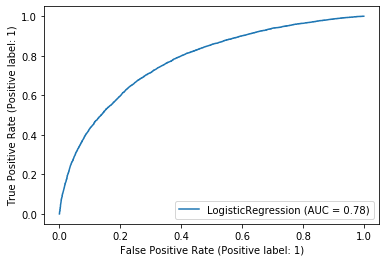

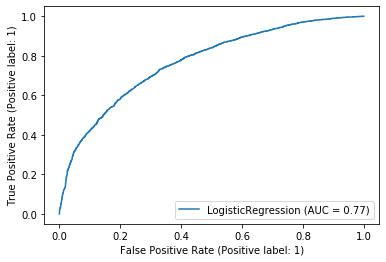

In [25]:
# plot ROC curves
logreg = ut.logreg_predict_score(X_train_nans, X_test_nans, y_train, y_test)
plot_roc_curve(logreg, X_train_nans, y_train)
plot_roc_curve(logreg, X_test_nans, y_test)

# slightly overfit

In [26]:
# scores when dropped 1 columns - female
# ROC Scores
# Train: 0.7817244813917411
# Test: 0.7748843069535213

# scores when dropped 2 columns - female and other race
# ROC Scores
# Train: 0.7803958619891809
# Test: 0.7782699504901386

# scores when 5 columns dropped
# ROC Scores
# Train: 0.780485435457886
# Test: 0.772152694994743
# worse!!!

In [27]:
# Let's scale it!  # test Standard Scaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_nans)
X_test_scaled = scaler.transform(X_test_nans)

In [28]:
ut.logreg_predict_score(X_train_scaled, X_test_scaled, y_train, y_test)

# no change - makes sense since everything is already on a 0-1 scale

ROC Scores
Train: 0.776435262203744
Test: 0.7692763278672884


Accuracy Scores
Train: 0.7085871193210185
Test: 0.6968698517298187


F1 Scores
Train: 0.6928379729516392
Test: 0.6771929824561403


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [29]:
# Let's scale it!  # test MixMax Scaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_nans)
X_test_scaled = scaler.transform(X_test_nans)

ut.logreg_predict_score(X_train_scaled, X_test_scaled, y_train, y_test)

# no change - makes sense since everything is already on a 0-1 scale

ROC Scores
Train: 0.7764393867678218
Test: 0.7691987207749218


Accuracy Scores
Train: 0.7106839740389416
Test: 0.7004642803654336


F1 Scores
Train: 0.6815759107643278
Test: 0.6662216288384513


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [30]:
# add interaction term for man & married

X_train_inter = X_train_nans.copy()
X_train_inter['man_Married'] = X_train_inter['sex_Male'] * X_train_inter['marital_status_Married']
X_train_inter

,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,race_Black,race_Hispanic,race_White,sex_Male,marital_status_Married,marital_status_Not Married,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,employment_industry_arjwrbjb,employment_industry_atmlpfrs,employment_industry_cfqqtusy,employment_industry_dotnnunm,employment_industry_fcxhlnwr,employment_industry_haxffmxo,employment_industry_ldnlellj,employment_industry_mcubkhph,employment_industry_mfikgejo,employment_industry_msuufmds,employment_industry_nduyfdeo,employment_industry_phxvnwax,employment_industry_pxcmvdjn,employment_industry_qnlwzans,employment_industry_rucpziij,employment_industry_saaquncn,employment_industry_vjjrobsf,employment_industry_wlfvacwt,employment_industry_wxleyezf,employment_industry_xicduogh,employment_industry_xqicxuve,employment_occupation_bxpfxfdn,employment_occupation_ccgxvspp,employment_occupation_cmhcxjea,employment_occupation_dcjcmpih,employment_occupation_dlvbwzss,employment_occupation_emcorrxb,employment_occupation_haliazsg,employment_occupation_hfxkjkmi,employment_occupation_hodpvpew,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_pvmttkik,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,man_Married
23127,1.00000,1.00000,0.00000,1.00000,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5547,0.00000,0.00000,0.00000,0.50000,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24940,0.00000,0.00000,0.00000,0.50000,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6502,0.00000,0.00000,1.00000,0.50000,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25897,1.00000,0.00000,0.00000,1.00000,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22902,0.00000,0.00000,0.00000,0.50000,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24897,0.00000,0.00000,0.00000,0.00000,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8834,0.00000,0.00000,0.00000,1.00000,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
23473,0.00000,0.50000,0.50000,0.50000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
# do same steps on X_test
X_test_inter = X_test_nans.copy()
X_test_inter['man_Married'] = X_test_inter['sex_Male'] * X_test_inter['marital_status_Married']
X_test_inter

,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,race_Black,race_Hispanic,race_White,sex_Male,marital_status_Married,marital_status_Not Married,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,employment_industry_arjwrbjb,employment_industry_atmlpfrs,employment_industry_cfqqtusy,employment_industry_dotnnunm,employment_industry_fcxhlnwr,employment_industry_haxffmxo,employment_industry_ldnlellj,employment_industry_mcubkhph,employment_industry_mfikgejo,employment_industry_msuufmds,employment_industry_nduyfdeo,employment_industry_phxvnwax,employment_industry_pxcmvdjn,employment_industry_qnlwzans,employment_industry_rucpziij,employment_industry_saaquncn,employment_industry_vjjrobsf,employment_industry_wlfvacwt,employment_industry_wxleyezf,employment_industry_xicduogh,employment_industry_xqicxuve,employment_occupation_bxpfxfdn,employment_occupation_ccgxvspp,employment_occupation_cmhcxjea,employment_occupation_dcjcmpih,employment_occupation_dlvbwzss,employment_occupation_emcorrxb,employment_occupation_haliazsg,employment_occupation_hfxkjkmi,employment_occupation_hodpvpew,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_pvmttkik,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,man_Married
13650,0.00000,0.00000,0.00000,0.50000,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
13853,0.00000,0.00000,0.00000,0.50000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20300,1.00000,0.00000,1.00000,0.50000,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13487,1.00000,0.00000,1.00000,1.00000,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8952,0.00000,1.00000,0.00000,0.50000,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,0.00000,0.00000,0.00000,0.50000,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
13077,0.00000,1.00000,0.00000,1.00000,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21267,1.00000,0.00000,0.00000,0.50000,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5005,1.00000,0.00000,0.00000,0.50000,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
# test version with interaction term

ut.logreg_predict_score(X_train_inter, X_test_inter, y_train, y_test)

# no change

ROC Scores
Train: 0.7764574167190446
Test: 0.7691473139814915


Accuracy Scores
Train: 0.710733899151273
Test: 0.7004642803654336


F1 Scores
Train: 0.681017397049108
Test: 0.6655518394648829


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

ROC Scores
Train: 0.7764385758705152
Test: 0.7691973655870457


Accuracy Scores
Train: 0.7106839740389416
Test: 0.7004642803654336


F1 Scores
Train: 0.6815759107643278
Test: 0.6662216288384513


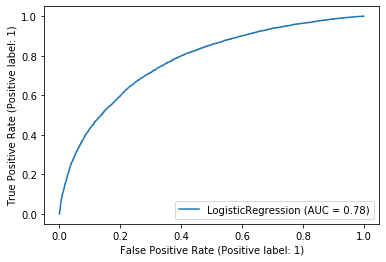

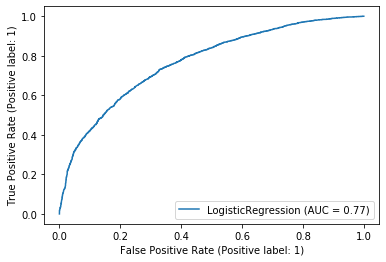

In [33]:
# test fit_intercept=True

# make logistic regression
logreg = LogisticRegression(fit_intercept=True, C=1e12, solver='liblinear')
logreg.fit(X_train_nans, y_train)

# print ROC scores
ut.eval_model(X_train_nans, X_test_nans, y_train, y_test, logreg)

# no change

LogisticRegression(C=10, fit_intercept=False, solver='liblinear')
ROC Scores
Train: 0.7764337405199097
Test: 0.7692062194811691


Accuracy Scores
Train: 0.7105341987019471
Test: 0.7006140482252509


F1 Scores
Train: 0.6813585403385358
Test: 0.6663328325822067


LogisticRegression(C=100, fit_intercept=False, solver='liblinear')
ROC Scores
Train: 0.7764398773106368
Test: 0.7691969138577538


Accuracy Scores
Train: 0.7106839740389416
Test: 0.7004642803654336


F1 Scores
Train: 0.6815759107643278
Test: 0.6662216288384513


LogisticRegression(C=1000, fit_intercept=False, solver='liblinear')
ROC Scores
Train: 0.7764403878756077
Test: 0.7691954683240194


Accuracy Scores
Train: 0.7106839740389416
Test: 0.7004642803654336


F1 Scores
Train: 0.6815759107643278
Test: 0.6662216288384513




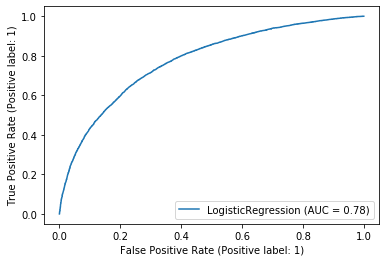

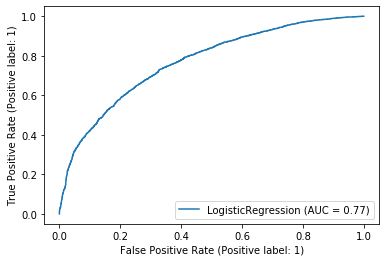

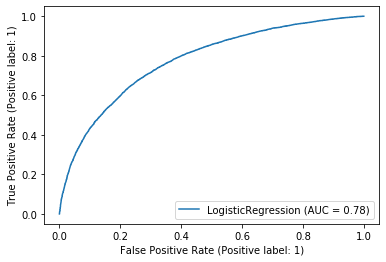

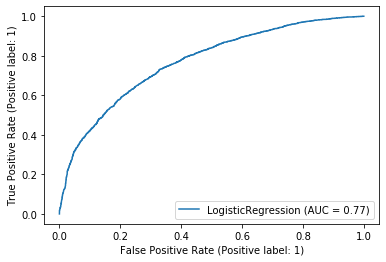

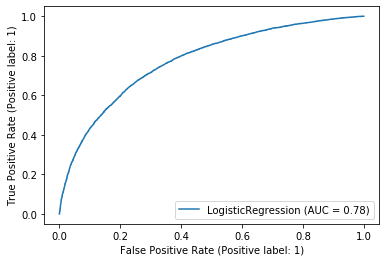

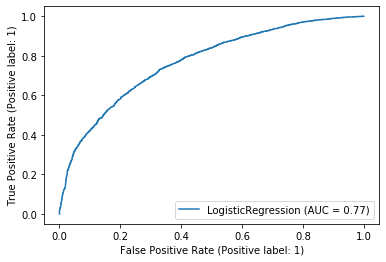

In [34]:
# test C

c_list = [10,100,1000]

# make logreg and score
for c in c_list:
    # make logistic regression
    logreg = LogisticRegression(fit_intercept=False, C=c, solver='liblinear')
    logreg.fit(X_train_nans, y_train)
    print(logreg)
    ut.eval_model(X_train_nans, X_test_nans, y_train, y_test, logreg)
    print('\n')
    
# no change

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='newton-cg')
ROC Scores
Train: 0.7764383956711138
Test: 0.7691992628500721


Accuracy Scores
Train: 0.7106839740389416
Test: 0.7004642803654336


F1 Scores
Train: 0.6815759107643278
Test: 0.6662216288384513




/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1000000000000.0, fit_intercept=False)


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ROC Scores
Train: 0.7764367438432672
Test: 0.7691404476962529


Accuracy Scores
Train: 0.7106340489266101
Test: 0.7004642803654336


F1 Scores
Train: 0.6815734534666521
Test: 0.6662216288384513


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')
ROC Scores
Train: 0.7764393867678218
Test: 0.7691987207749218


Accuracy Scores
Train: 0.7106839740389416
Test: 0.7004642803654336


F1 Scores
Train: 0.6815759107643278
Test: 0.6662216288384513


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='sag')
ROC Scores
Train: 0.7764386859923718
Test: 0.7692000759627977


Accuracy Scores
Train: 0.7106839740389416
Test: 0.7004642803654336


F1 Scores
Train: 0.6815759107643278
Test: 0.6662216288384513


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='saga')
ROC Scores
Train: 0.7764382054606345
Test: 0.7691987207749217


Accuracy Scores
Train: 0.7106839740389416
Test: 0.7004642803654336


F1 Scores
Train: 0.6815759107643278
Test: 0.666221628

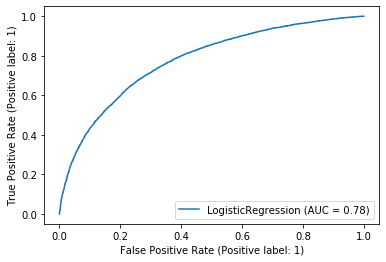

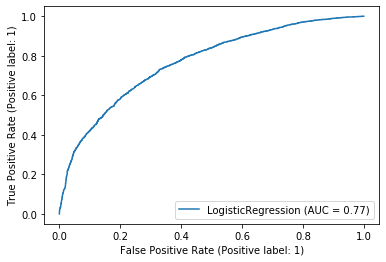

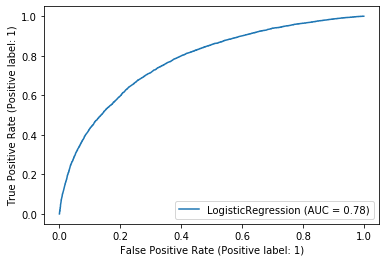

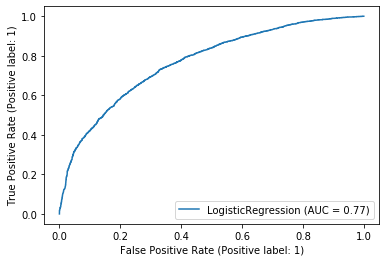

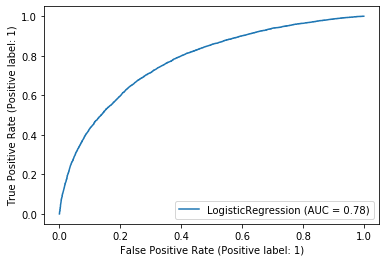

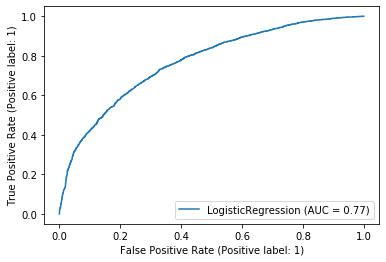

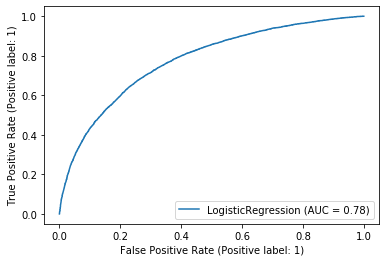

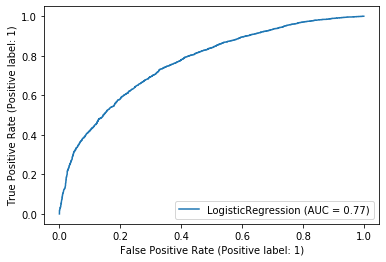

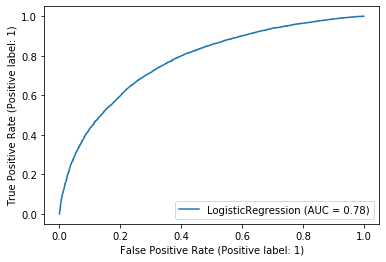

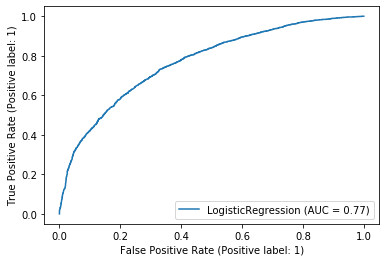

In [35]:
# test solvers

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for s in solvers:
    # make logistic regression
    logreg = LogisticRegression(fit_intercept=False, C=1e12, solver=s)
    logreg.fit(X_train_nans, y_train)
    # score
    print(logreg)
    ut.eval_model(X_train_nans, X_test_nans, y_train, y_test, logreg)
    print('\n')
    
    # no change

In [36]:
# no change when using different scalers, adding interaction terms, or changing logreg parameters
# stick with inital df (X_train_nans)
# stick with initial values for logreg
best_logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
best_logreg.fit(X_train_nans, y_train)

# check out coefficients
len(best_logreg.coef_[0])
len(X_train_nans.columns)

coef_dict={}

for n, c in enumerate(X_train_nans.columns):
    coef_dict[c]=round(best_logreg.coef_[0][n],2)

sorted_coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1], reverse=True)}

df = pd.DataFrame.from_dict(sorted_coef_dict, orient='index', columns=['weight'])
df['abs_weight']=np.abs(df['weight'])
df.sort_values(by = 'abs_weight', ascending=False)

,weight,abs_weight
doctor_recc_seasonal,1.43000,1.43000
employment_industry_haxffmxo,1.41000,1.41000
employment_occupation_dcjcmpih,1.41000,1.41000
age_group_18 - 34 Years,-1.13000,1.13000
census_msa_Non-MSA,-0.96000,0.96000
employment_industry_msuufmds,0.96000,0.96000
age_group_35 - 44 Years,-0.83000,0.83000
"census_msa_MSA, Not Principle City",-0.82000,0.82000
"census_msa_MSA, Principle City",-0.81000,0.81000
health_insurance,0.74000,0.74000


In [37]:
# some coefficients are surprising, for example why is non-MSA service area such a big influence?
# in the bar plots, the proportions of vaccine vs no vaccine looked similar to other groups
# so I ran the lists below to be sure my coefficients were linking up to the right column labels
# they are

tuple_list = []

for n in range(len(X_train_nans.columns)):
    tuple = (n, best_logreg.coef_[0][n])
    tuple_list.append(tuple)
    
tuple_list

[(0, 1.433061028100961),
 (1, 0.35716096920881674),
 (2, 0.6085522120228715),
 (3, 0.7427449700317325),
 (4, -1.1250202912330474),
 (5, -0.831202567044121),
 (6, -0.6895736357661723),
 (7, -0.2905384610269545),
 (8, 0.342929463708083),
 (9, -0.5200562623687945),
 (10, 0.012392493733734787),
 (11, 0.10359713079065172),
 (12, -0.09768690851306544),
 (13, 0.08854639261154963),
 (14, -0.08126922011272572),
 (15, 0.0024860640036397496),
 (16, 0.22570637669272514),
 (17, -0.05487972683990532),
 (18, -0.15513104743899656),
 (19, -0.20257869440637627),
 (20, -0.4040448150464629),
 (21, -0.2346508211588115),
 (22, -0.15878363334959444),
 (23, -0.4011078097577337),
 (24, -0.25413023996468087),
 (25, -0.30724168380349837),
 (26, -0.18274763755915677),
 (27, -0.29298910889000596),
 (28, -0.8220495014137656),
 (29, -0.8106553249793971),
 (30, -0.9607006649727011),
 (31, 0.48907435138246264),
 (32, 0.41753888251896126),
 (33, 0.18132707664908262),
 (34, 0.3043995229419998),
 (35, 0.6464855036323626)

In [38]:
col_list = []

for n in range(len(X_train_nans.columns)):
    tuple = (n, X_train_nans.columns[n])
    col_list.append(tuple)
    
col_list

[(0, 'doctor_recc_seasonal'),
 (1, 'chronic_med_condition'),
 (2, 'health_worker'),
 (3, 'health_insurance'),
 (4, 'age_group_18 - 34 Years'),
 (5, 'age_group_35 - 44 Years'),
 (6, 'age_group_45 - 54 Years'),
 (7, 'age_group_55 - 64 Years'),
 (8, 'age_group_65+ Years'),
 (9, 'race_Black'),
 (10, 'race_Hispanic'),
 (11, 'race_White'),
 (12, 'sex_Male'),
 (13, 'marital_status_Married'),
 (14, 'marital_status_Not Married'),
 (15, 'employment_status_Employed'),
 (16, 'employment_status_Not in Labor Force'),
 (17, 'employment_status_Unemployed'),
 (18, 'hhs_geo_region_atmpeygn'),
 (19, 'hhs_geo_region_bhuqouqj'),
 (20, 'hhs_geo_region_dqpwygqj'),
 (21, 'hhs_geo_region_fpwskwrf'),
 (22, 'hhs_geo_region_kbazzjca'),
 (23, 'hhs_geo_region_lrircsnp'),
 (24, 'hhs_geo_region_lzgpxyit'),
 (25, 'hhs_geo_region_mlyzmhmf'),
 (26, 'hhs_geo_region_oxchjgsf'),
 (27, 'hhs_geo_region_qufhixun'),
 (28, 'census_msa_MSA, Not Principle  City'),
 (29, 'census_msa_MSA, Principle City'),
 (30, 'census_msa_Non-MSA

ROC Scores
Train: 0.9904010181506449
Test: 0.6331933755525553


Accuracy Scores
Train: 0.9349975037443834
Test: 0.6272277969147821


F1 Scores
Train: 0.9292468209977176
Test: 0.588934764657308


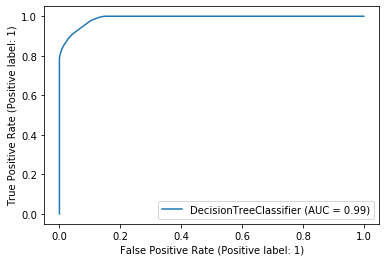

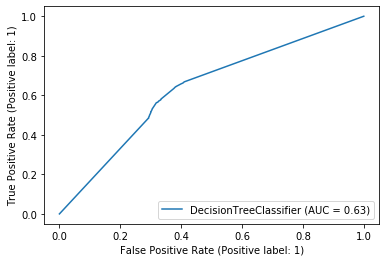

In [39]:
# let's do another model!

tree = DecisionTreeClassifier()

ut.eval_model(X_train_nans, X_test_nans, y_train, y_test, tree)

# yikes, that's really overfit!  let's prune the tree

ROC Scores
Train: 0.7724603136847109
Test: 0.7606115727985244


Accuracy Scores
Train: 0.7139291063404892
Test: 0.7004642803654336


F1 Scores
Train: 0.6907717215326498
Test: 0.673202614379085


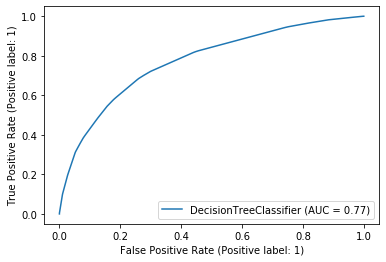

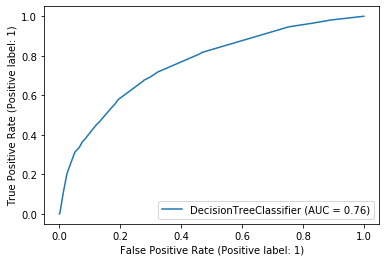

In [40]:
tree = DecisionTreeClassifier(max_depth=6, min_samples_split=10, min_samples_leaf=5, max_features=55, criterion='gini')

ut.eval_model(X_train_nans, X_test_nans, y_train, y_test, tree)

# better, but not better than logreg

In [41]:
def order_features(weights, X_train):
    
    coef_dict = {}

    for n, c in enumerate(X_train.columns):
        coef_dict[c]=round(weights[n],4)

    sorted_coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1], reverse=True)}
    df = pd.DataFrame.from_dict(sorted_coef_dict, orient='index', columns=['weight'])
    df['abs_weight']=np.abs(df['weight'])
    weights_df = df.sort_values(by = 'abs_weight', ascending=False)
    
    return weights_df

In [42]:
tree.feature_importances_

array([5.64179203e-01, 1.15728104e-02, 8.65971371e-02, 2.09752949e-02,
       9.82938455e-02, 2.68547756e-03, 0.00000000e+00, 2.05582435e-02,
       1.22749653e-01, 3.74757944e-03, 1.10498284e-03, 7.27595506e-03,
       1.23870937e-03, 2.84358154e-03, 8.46080517e-04, 0.00000000e+00,
       2.42014880e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.63249271e-03, 5.39579241e-04, 0.00000000e+00, 0.00000000e+00,
       3.32209584e-03, 1.53772672e-03, 1.03454259e-03, 0.00000000e+00,
       6.30324567e-03, 5.67067285e-04, 7.72009895e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.92329097e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.27265353e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.02865806e-03, 1.80544662e-02,
      

In [43]:
order_features(tree.feature_importances_, X_train_nans)

,weight,abs_weight
doctor_recc_seasonal,0.56420,0.56420
age_group_65+ Years,0.12270,0.12270
age_group_18 - 34 Years,0.09830,0.09830
health_worker,0.08660,0.08660
health_insurance,0.02100,0.02100
age_group_55 - 64 Years,0.02060,0.02060
employment_occupation_dcjcmpih,0.01810,0.01810
chronic_med_condition,0.01160,0.01160
employment_occupation_cmhcxjea,0.00800,0.00800
race_White,0.00730,0.00730


In [44]:
tree_param_grid = {'criterion': ['gini', 'entropy'],
                 'max_depth': [None, 4, 6, 8],
                 'min_samples_leaf': [10, 12, 14],
                 'min_samples_split': [8, 10, 12],
                  'max_features': [45, 50, 55]}
                 
tree_grid_search = GridSearchCV(tree, tree_param_grid, cv=3)
tree_grid_search.fit(X_train_nans, y_train)

print(f"Training Accuracy: {tree_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {tree_grid_search.best_params_}")

Training Accuracy: 71.08%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 50, 'min_samples_leaf': 14, 'min_samples_split': 10}


ROC Scores
Train: 0.768589355236931
Test: 0.754225792007933


Accuracy Scores
Train: 0.7143285072391413
Test: 0.6971693874494533


F1 Scores
Train: 0.6967994913098771
Test: 0.6747104247104247


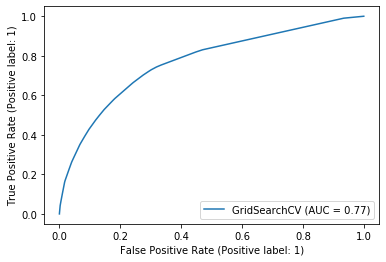

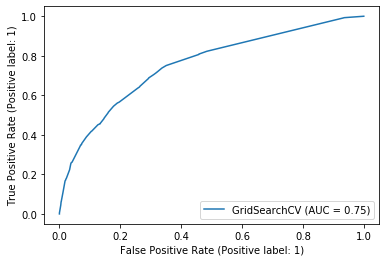

In [45]:
ut.eval_model(X_train_nans, X_test_nans, y_train, y_test, tree_grid_search)

In [46]:
tree_grid_search.best_estimator_.feature_importances_

array([5.66671992e-01, 1.44841915e-02, 9.25872300e-02, 2.21758218e-02,
       2.18600760e-03, 0.00000000e+00, 0.00000000e+00, 4.94668513e-02,
       1.80568703e-01, 1.34540476e-02, 0.00000000e+00, 3.64292741e-03,
       0.00000000e+00, 5.27680841e-03, 0.00000000e+00, 0.00000000e+00,
       3.79341709e-03, 0.00000000e+00, 1.29355267e-03, 0.00000000e+00,
       0.00000000e+00, 2.35660060e-04, 0.00000000e+00, 1.24410330e-03,
       1.67173909e-03, 0.00000000e+00, 1.04309023e-03, 0.00000000e+00,
       1.17058017e-03, 5.49053581e-04, 2.73214279e-04, 3.93689729e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00159034e-02,
       2.18622562e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.32824946e-03, 0.00000000e+00,
      

In [47]:
order_features(tree_grid_search.best_estimator_.feature_importances_, X_train_nans)

# what does it mean that so many features are unused?

,weight,abs_weight
doctor_recc_seasonal,0.56670,0.56670
age_group_65+ Years,0.18060,0.18060
health_worker,0.09260,0.09260
age_group_55 - 64 Years,0.04950,0.04950
health_insurance,0.02220,0.02220
employment_industry_haxffmxo,0.02190,0.02190
chronic_med_condition,0.01450,0.01450
race_Black,0.01350,0.01350
employment_industry_fcxhlnwr,0.01000,0.01000
marital_status_Married,0.00530,0.00530


In [48]:
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)
bagged_tree.fit(X_train_nans, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

ROC Scores
Train: 0.7747413628024227
Test: 0.7651347833723146


Accuracy Scores
Train: 0.7145781328007988
Test: 0.6989666017672608


F1 Scores
Train: 0.6986135273340713
Test: 0.6792211937440152


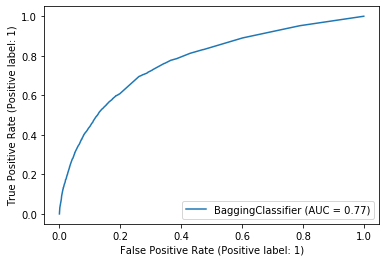

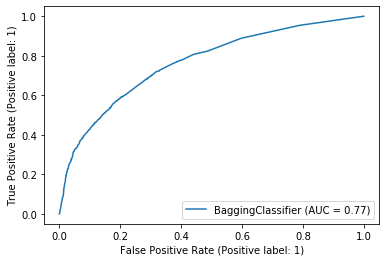

In [49]:
ut.eval_model(X_train_nans, X_test_nans, y_train, y_test, bagged_tree)

# better score.  Try a random forest

In [50]:
forest = RandomForestClassifier(n_estimators=100, max_depth=5)
forest.fit(X_train_nans, y_train)

RandomForestClassifier(max_depth=5)

ROC Scores
Train: 0.7756998534298113
Test: 0.7658860995307797


Accuracy Scores
Train: 0.7119820269595607
Test: 0.6982177624681744


F1 Scores
Train: 0.6750408381681968
Test: 0.6559672187126515


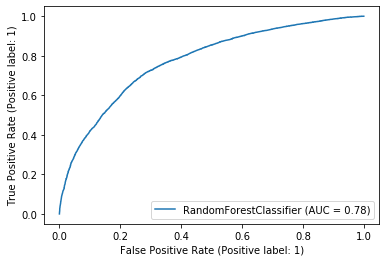

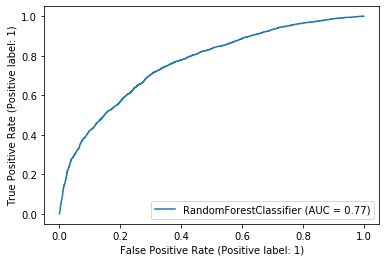

In [51]:
ut.eval_model(X_train_nans, X_test_nans, y_train, y_test, forest)

# good score

In [52]:
rf_param_grid = {'n_estimators': [50, 100, 150],
                 'criterion': ['gini', 'entropy'],
                 'max_depth': [6, 10, 14],
                 'min_samples_leaf': [3, 6, 9],
                'min_samples_split': [5, 10, 15]}
                 
rf_grid_search = GridSearchCV(forest, rf_param_grid, cv=3)
rf_grid_search.fit(X_train_nans, y_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")



Training Accuracy: 71.56%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 100}


ROC Scores
Train: 0.8265869080089263
Test: 0.7726376455291087


Accuracy Scores
Train: 0.7437343984023964
Test: 0.7021117268234237


F1 Scores
Train: 0.7197685210460228
Test: 0.6710765668926741


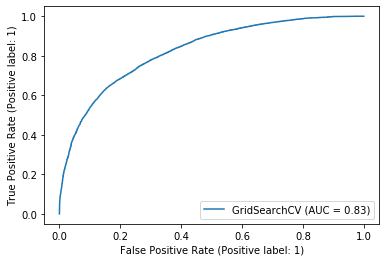

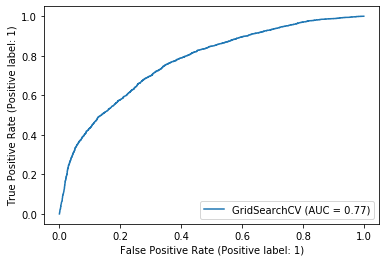

In [53]:
ut.eval_model(X_train_nans, X_test_nans, y_train, y_test, rf_grid_search)
# overfit

In [54]:
XGB = XGBClassifier()

# Fit XGBClassifier
XGB.fit(X_train_nans, y_train)


XGBClassifier()

ROC Scores
Train: 0.7875228913306308
Test: 0.7749448077151027


Accuracy Scores
Train: 0.7193210184722916
Test: 0.7046577804403175


F1 Scores
Train: 0.6932896890343698
Test: 0.6739417989417988


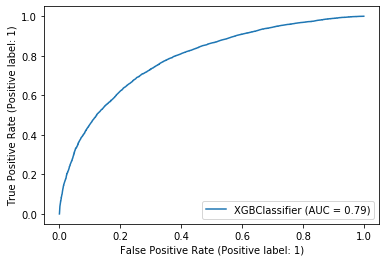

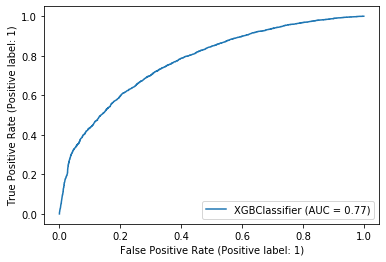

In [55]:
ut.eval_model(X_train_nans, X_test_nans, y_train, y_test, XGB)
# overfit --> prune

In [56]:
xgb_param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6, 8],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100]}

In [57]:
grid_XGB = GridSearchCV(XGB, xgb_param_grid, cv=None, n_jobs=1)
grid_XGB.fit(X_train_nans, y_train)
# not better... try different parameters?

GridSearchCV(estimator=XGBClassifier(), n_jobs=1,
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [6, 8],
                         'min_child_weight': [1, 2], 'n_estimators': [100],
                         'subsample': [0.5, 0.7]})

ROC Scores
Train: 0.8132536789910243
Test: 0.7720840512817548


Accuracy Scores
Train: 0.7367948077883175
Test: 0.702261494683241


F1 Scores
Train: 0.7133847993911059
Test: 0.6720554272517322


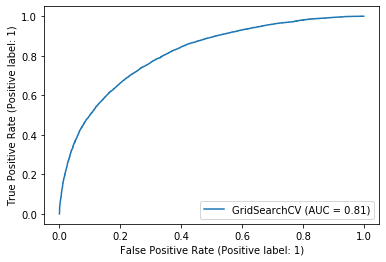

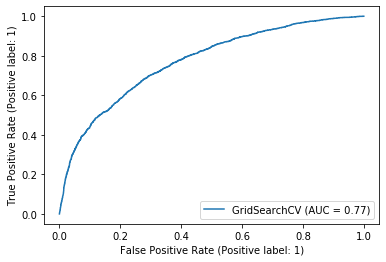

In [58]:
ut.eval_model(X_train_nans, X_test_nans, y_train, y_test, grid_XGB)
# overfit

In [59]:
SVM = SVC(kernel='linear')
SVM.fit(X_train_nans, y_train)

SVC(kernel='linear')

In [60]:
y_train_pred = SVM.predict(X_train_nans)
y_test_pred = SVM.predict(X_test_nans)

#     print('ROC Scores')
#     print('Train:', roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
#     print('Test:', roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
#     print('\n')
print('Accuracy Scores')
print('Train:', accuracy_score(y_train, y_train_pred))
print('Test:', accuracy_score(y_test, y_test_pred))
print('\n')
print('F1 Scores')
print('Train:', f1_score(y_train, y_train_pred))
print('Test:', f1_score(y_test, y_test_pred))

#     plot_roc_curve(model, X_train, y_train)
#     plot_roc_curve(model, X_test, y_test);

# worse scores

Accuracy Scores
Train: 0.709236145781328
Test: 0.7004642803654336


F1 Scores
Train: 0.6775550880301184
Test: 0.6644295302013422


In [61]:
ut.eval_model(X_train_nans, X_test_nans, y_train, y_test, SVM)

ROC Scores


AttributeError: predict_proba is not available when  probability=False